Urban Data Science & Smart Cities <br>
URSP688Y Spring 2025<br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

# Demo 7 - Geospatial Data

- Coordinate systems
- Points from XY
- Loading shapefiles and geojsons
- Proximity analysis
    - Measuring distance
    - Buffering
- Overlay analysis
- Spatial joining

## Geospatial data fundamentals
- Basic geometry types:
    - Points
    - Linestrings
    - Polygons

<img alt="points, lines, and polygons" width=500 src="https://datacarpentry.org/organization-geospatial/fig/dc-spatial-vector/pnt_line_poly.png">

- Spatial analysis (with vector data) is essentially just Euclidean geometry (remember the Pythagorean theorem?)

<img alt="pythagorean theorem" width=500 src="https://www.katesmathlessons.com/uploads/1/6/1/0/1610286/published/how-to-use-the-pythagorean-theorem-to-find-distance-between-points-on-coordinate-plane-2.png?1595954050">

## Geospatial data are everywhere

DC affordable housing: https://opendata.dc.gov/datasets/DCGIS::affordable-housing/about

In [1]:
# Install Geopandas

# ! conda install -y geopandas

In [2]:
# Import dependencies
import pandas as pd
import geopandas as gpd

## Make points from CSV

In [3]:
df = pd.read_csv('Affordable_Housing.csv')

In [4]:
df.head(1)

,X,Y,OBJECTID,MAR_WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,...,AFFORDABLE_UNITS_AT_31_50_AMI,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,MAR_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM
0,-77.009383,38.910255,89281,Ward 6,"1520 North Capitol Street Northwest, Washingto...",Cycle House,Under Construction,DMPED DHCD,18,38.910248,...,4,12,0,0,NaN,331764,399186.36,138042.91,1520 NORTH CAPITOL STREET NW,2024/02/05 05:00:27+00


In [5]:
gpd.points_from_xy(df['LONGITUDE'], df['LATITUDE'])

<GeometryArray>
[ <POINT (-77.009 38.91)>, <POINT (-77.009 38.906)>,  <POINT (-77.03 38.963)>,
 <POINT (-76.951 38.922)>, <POINT (-77.033 38.967)>, <POINT (-77.051 38.905)>,
  <POINT (-77.023 38.93)>, <POINT (-77.025 38.904)>, <POINT (-76.985 38.916)>,
 <POINT (-76.997 38.859)>,
 ...
 <POINT (-77.023 38.933)>, <POINT (-76.983 38.926)>,  <POINT (-76.991 38.93)>,
  <POINT (-77.028 38.95)>, <POINT (-77.027 38.966)>, <POINT (-77.023 38.955)>,
 <POINT (-76.932 38.885)>, <POINT (-76.989 38.882)>, <POINT (-77.023 38.917)>,
 <POINT (-77.021 38.913)>]
Length: 878, dtype: geometry

In [6]:
gdf = gpd.GeoDataFrame(
    df, # Attribute table
    geometry=gpd.points_from_xy(df['LONGITUDE'], df['LATITUDE']), # Geometries
    crs=4326 # Coordinate system of geometries
)

In [7]:
gdf.head(1)

,X,Y,OBJECTID,MAR_WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,...,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,MAR_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM,geometry
0,-77.009383,38.910255,89281,Ward 6,"1520 North Capitol Street Northwest, Washingto...",Cycle House,Under Construction,DMPED DHCD,18,38.910248,...,12,0,0,NaN,331764,399186.36,138042.91,1520 NORTH CAPITOL STREET NW,2024/02/05 05:00:27+00,POINT (-77.00938 38.91025)


<Axes: >

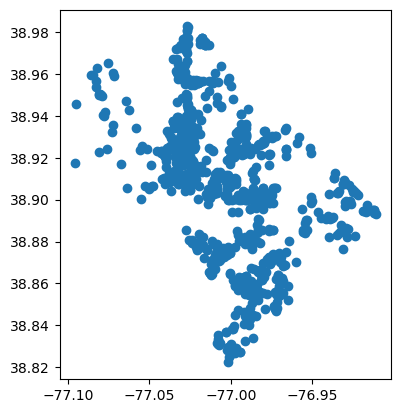

In [8]:
gdf.plot()

## Measuring proximity

### How far is each affordable housing project from Metro Center?
- Map projections

In [9]:
# Let's start by reloading the data with more descriptive variable names so we don't get confused
projects_df = pd.read_csv('Affordable_Housing.csv')
projects_gdf = gpd.GeoDataFrame(projects_df, geometry=gpd.points_from_xy(projects_df['LONGITUDE'], projects_df['LATITUDE']), crs=4326)

metro_center_lon = -77.0312124
metro_center_lat = 38.898202
metro_center_gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy([metro_center_lon], [metro_center_lat]), crs=4326)

In [10]:
# What's wrong here?
projects_gdf.distance(metro_center_gdf.geometry.iloc[0])

/var/folders/cp/34sfrw4102x64df08gn6pccm0000gq/T/ipykernel_35228/1150215707.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  projects_gdf.distance(metro_center_gdf.geometry.iloc[0])


0      0.024934
1      0.023269
2      0.064320
3      0.083922
4      0.069172
         ...   
873    0.057469
874    0.099904
875    0.044756
876    0.020832
877    0.018455
Length: 878, dtype: float64

## UTM Zones

[Universal Transverse Mercator](https://en.wikipedia.org/wiki/Universal_Transverse_Mercator_coordinate_system) Zones

The UTM system divides the globe into 120 zones, 60 each in the northern and southern hemispheres. It uses Transverse Mercator projections to minimize shape and distance distortion for localized measurements within each zone.

<img alt="utm slices" width=500 src="https://gisgeography.com/wp-content/uploads/2016/05/UTM-Zones-Globe-2.png">

<img alt="utm standard line" width=500 src="https://gisgeography.com/wp-content/uploads/2016/05/Universe-Transverse-Mercator-Cylinder.png">

1. [What UTM zone am I in?](https://mangomap.com/robertyoung/maps/69585/what-utm-zone-am-i-in-#)
2. [What is the EPSG code for that zone?](https://www.google.com/search?q=epsg+code+for+UTM18N&rlz=1C5GCCM_en&oq=epsg+code+for+UTM18N&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIHCAEQIRigATIHCAIQIRigATIHCAMQIRigATIHCAQQIRigATIHCAUQIRigATIHCAYQIRiPAjIHCAcQIRiPAtIBCDcxMDJqMGo3qAIAsAIA&sourceid=chrome&ie=UTF-8)

In [11]:
# Reproject into the local UTM zone
utm18n = 32618
projects_gdf = projects_gdf.to_crs(epsg=utm18n)
metro_center_gdf = metro_center_gdf.to_crs(epsg=utm18n)

# Measures distance from each project to the metro center point
metro_center_point = metro_center_gdf.geometry.iloc[0] 
projects_gdf['dist_to_metro_center'] = projects_gdf.distance(metro_center_point)

In [12]:
projects_gdf.head(1)

,X,Y,OBJECTID,MAR_WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,...,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,MAR_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM,geometry,dist_to_metro_center
0,-77.009383,38.910255,89281,Ward 6,"1520 North Capitol Street Northwest, Washingto...",Cycle House,Under Construction,DMPED DHCD,18,38.910248,...,0,0,NaN,331764,399186.36,138042.91,1520 NORTH CAPITOL STREET NW,2024/02/05 05:00:27+00,POINT (325776.94 4308736.049),2318.204511


In [13]:
threshold_dist = 1609.3
projects_near_metro_center = projects_gdf[projects_gdf['dist_to_metro_center'] <= threshold_dist]

In [14]:
m = projects_gdf.explore(color='grey', tiles='CartoDB positron')
m = projects_near_metro_center.explore(m=m, color='blue')
m = metro_center_gdf.explore(m=m, color='red')
m

### Which projects are within 1 mile of Metro Center or Columbia Heights?

#### Another approach: Buffer and spatial join

In [15]:
# Define multiple locations
metro_locations = {
    'Metro Center': {
        'lon': -77.0312124, 
        'lat': 38.898202
    },
    'Columbia Heights': {
        'lon': -77.0350154, 
        'lat': 38.92890
    },
}

# Convert to a geodataframe
metro_locations_df = pd.DataFrame.from_dict(metro_locations, orient='index')
metro_locations_points = gpd.points_from_xy(metro_locations_df['lon'], metro_locations_df['lat'])
metro_locations_gdf = gpd.GeoDataFrame(metro_locations_df, geometry=metro_locations_points, crs=4326)
metro_locations_gdf = metro_locations_gdf.to_crs(utm18n)

In [16]:
# Buffer metro locations
metro_locations_buffer = metro_locations_gdf.buffer(threshold_dist)

In [17]:
metro_locations_buffer.explore(tiles='CartoDB positron')

In [18]:
metro_locations_buffer_gdf = gpd.GeoDataFrame(geometry=metro_locations_buffer)
metro_locations_buffer_gdf

,geometry
Metro Center,"POLYGON ((325463.42 4307441.122, 325455.671 43..."
Columbia Heights,"POLYGON ((325209.639 4310855.471, 325201.89 43..."


In [19]:
projects_near_metro = gpd.sjoin(projects_gdf, metro_locations_buffer_gdf)

In [20]:
projects_near_metro.head()

,X,Y,OBJECTID,MAR_WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,...,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,MAR_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM,geometry,dist_to_metro_center,index_right
6,-77.022998,38.929740,89287,Ward 1,"660 Kenyon Street Northwest, Washington, Distr...",Kenyon House Family Tenants Association,Completed 2015 to Date,DHCD,8,38.929733,...,0,NaN,298206,398006.09,140206.08,660 KENYON STREET NW,2024/02/05 05:00:27+00,POINT (324644.372 4310924.68),3572.068946,Columbia Heights
7,-77.025115,38.904447,89288,Ward 2,"915 L Street Northwest, Washington, District o...",Square 369,Completed 2015 to Date,OP,23,38.904439,...,0,14-09,315500,397821.73,137398.39,915 L STREET NW,2024/02/05 05:00:27+00,POINT (324398.469 4308121.59),871.408655,Metro Center
18,-77.031728,38.907595,89299,Ward 2,"1301 14th St NW, Washington, District of Colum...",N Street Village,Completed 2015 to Date,DCHA DCHFA DHCD,95,38.907588,...,0,NaN,225359,397248.32,137748.04,1301 14TH STREET NW,2024/02/05 05:00:27+00,POINT (323832.847 4308483.777),1042.872436,Metro Center
19,-77.015444,38.902768,89300,Ward 6,"307 K Street Northwest, Washington, District o...",Plaza West,Completed 2015 to Date,DMPED DCHA DCHFA DHCD,223,38.902760,...,0,NaN,312744,398660.57,137211.83,307 K STREET NW,2024/02/05 05:00:27+00,POINT (325233.04 4307916.677),1458.620722,Metro Center
23,-77.032270,38.919383,89304,Ward 1,"2202 14th Street NW, Washington, District of C...",Lumen Condominiums,Completed 2015 to Date,DHCD,2,38.919376,...,0,NaN,239928,397201.70,139056.65,2202 14TH STREET NW,2024/02/05 05:00:27+00,POINT (323814.936 4309793.137),2352.341459,Columbia Heights


In [21]:
projects_near_metro = projects_near_metro.rename(columns={'index_right':'near_metro'})

In [22]:
projects_near_metro['near_metro'].value_counts()

near_metro
Columbia Heights    130
Metro Center         39
Name: count, dtype: int64

In [23]:
projects_near_metro.explore(column='near_metro', tiles='CartoDB positron')

## Overlay

### How many projects are in each census tract?

- [Population by Tract from Census Reporter](https://censusreporter.org/data/table/?table=B01003&geo_ids=16000US1150000,140|16000US1150000&primary_geo_id=16000US1150000)

In [24]:
# Load tract polygons from geojson
tracts_gdf = gpd.read_file('acs2023_5yr_B01003_14000US11001007409.geojson')
# Project into local UTM
tracts_gdf = tracts_gdf.to_crs(utm18n)
# Only keep records that are tracts (there's pesky one for all of Washington DC)
tracts_gdf = tracts_gdf[tracts_gdf.geoid.str.len() == 18]

<Axes: >

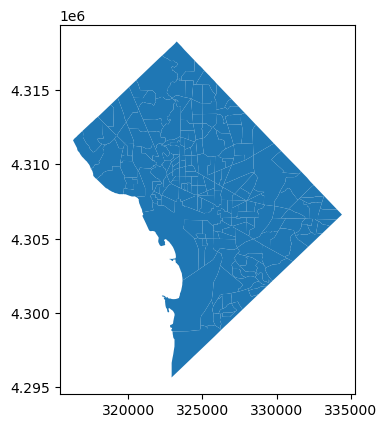

In [25]:
tracts_gdf.plot()

In [26]:
# Ensure projects and tracts are in the same projection (CRS: coordinate reference system)
assert projects_gdf.crs == tracts_gdf.crs

In [27]:
# Spatially join projects to tracts
tracts_with_projects_gdf = gpd.sjoin(tracts_gdf, projects_gdf, how='left')

In [28]:
tracts_with_projects_gdf.head()

,geoid,name,B01003001,"B01003001, Error",geometry,index_right,X,Y,OBJECTID,MAR_WARD,...,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,MAR_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM,dist_to_metro_center
0,14000US11001000101,"Census Tract 1.01, District of Columbia, DC",1181.0,205.0,"MULTIPOLYGON (((321636.384 4308861.291, 321646...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14000US11001000102,"Census Tract 1.02, District of Columbia, DC",3056.0,396.0,"MULTIPOLYGON (((320559.557 4307779.46, 320608....",741.0,-77.067295,38.917119,90022.0,Ward 2,...,37.0,0.0,0.0,NaN,279700.0,394164.18,138806.95,3300 WHITEHAVEN STREET NW,2024/02/05 05:00:27+00,3768.366306
2,14000US11001000201,"Census Tract 2.01, District of Columbia, DC",2835.0,45.0,"MULTIPOLYGON (((319723.182 4309141.763, 319744...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14000US11001000202,"Census Tract 2.02, District of Columbia, DC",3964.0,481.0,"MULTIPOLYGON (((319648.174 4308298.994, 319649...",763.0,-77.063880,38.905778,90044.0,Ward 2,...,9.0,0.0,0.0,NaN,302076.0,394459.43,137547.75,3220 PROSPECT STREET NW,2024/02/05 05:00:27+00,2955.488083
4,14000US11001000300,"Census Tract 3, District of Columbia, DC",5669.0,709.0,"MULTIPOLYGON (((319453.518 4310093.782, 319459...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Count unique projects in each tract
project_counts = tracts_with_projects_gdf.groupby('geoid').index_right.nunique()

project_counts

geoid
14000US11001000101     0
14000US11001000102     1
14000US11001000201     0
14000US11001000202     1
14000US11001000300     0
                      ..
14000US11001010900     0
14000US11001011001     2
14000US11001011002     1
14000US11001011100    12
14000US11001980000     0
Name: index_right, Length: 206, dtype: int64

In [30]:
# Join counts onto tracts
tracts_with_counts_gdf = tracts_gdf.merge(project_counts, left_on='geoid', right_index=True)

In [31]:
tracts_with_counts_gdf.head()

,geoid,name,B01003001,"B01003001, Error",geometry,index_right
0,14000US11001000101,"Census Tract 1.01, District of Columbia, DC",1181.0,205.0,"MULTIPOLYGON (((321636.384 4308861.291, 321646...",0
1,14000US11001000102,"Census Tract 1.02, District of Columbia, DC",3056.0,396.0,"MULTIPOLYGON (((320559.557 4307779.46, 320608....",1
2,14000US11001000201,"Census Tract 2.01, District of Columbia, DC",2835.0,45.0,"MULTIPOLYGON (((319723.182 4309141.763, 319744...",0
3,14000US11001000202,"Census Tract 2.02, District of Columbia, DC",3964.0,481.0,"MULTIPOLYGON (((319648.174 4308298.994, 319649...",1
4,14000US11001000300,"Census Tract 3, District of Columbia, DC",5669.0,709.0,"MULTIPOLYGON (((319453.518 4310093.782, 319459...",0


In [32]:
# Cleanup columns
columns = {
    'geoid':'geoid',
    'B01003001':'population',
    'index_right':'projects',
    'geometry':'geometry'
}
tracts_with_counts_gdf = tracts_with_counts_gdf[columns.keys()].rename(columns=columns)

In [33]:
tracts_with_counts_gdf.head()

,geoid,population,projects,geometry
0,14000US11001000101,1181.0,0,"MULTIPOLYGON (((321636.384 4308861.291, 321646..."
1,14000US11001000102,3056.0,1,"MULTIPOLYGON (((320559.557 4307779.46, 320608...."
2,14000US11001000201,2835.0,0,"MULTIPOLYGON (((319723.182 4309141.763, 319744..."
3,14000US11001000202,3964.0,1,"MULTIPOLYGON (((319648.174 4308298.994, 319649..."
4,14000US11001000300,5669.0,0,"MULTIPOLYGON (((319453.518 4310093.782, 319459..."


<Axes: >

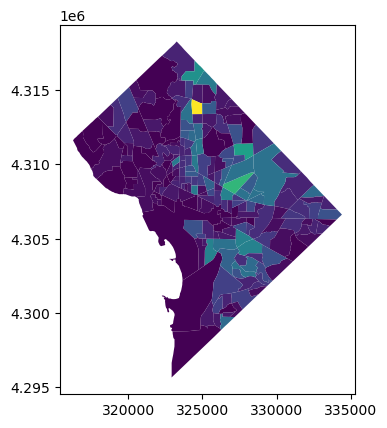

In [34]:
tracts_with_counts_gdf.plot(column='projects')

In [35]:
# Calculate projects per population
tracts_with_counts_gdf['projects_per_population'] = tracts_with_counts_gdf['projects'] / tracts_with_counts_gdf['population']

<Axes: >

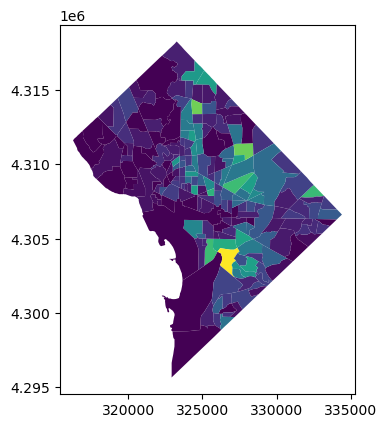

In [36]:
tracts_with_counts_gdf.plot(column='projects_per_population')

### How many units are in each census tract?

In [37]:
# Use a the general 'agg' method to aggregate multiple columns at once by different methods
project_stats = tracts_with_projects_gdf.groupby('geoid').agg({
    'index_right': 'nunique',
    'TOTAL_AFFORDABLE_UNITS': 'sum',
})

tracts_with_counts_gdf = tracts_gdf.merge(project_stats, left_on='geoid', right_index=True)

columns = {
    'geoid':'geoid',
    'B01003001':'population',
    'index_right':'projects',
    'TOTAL_AFFORDABLE_UNITS': 'units',
    'geometry':'geometry',
}
tracts_with_counts_gdf = tracts_with_counts_gdf[columns.keys()].rename(columns=columns)

<Axes: >

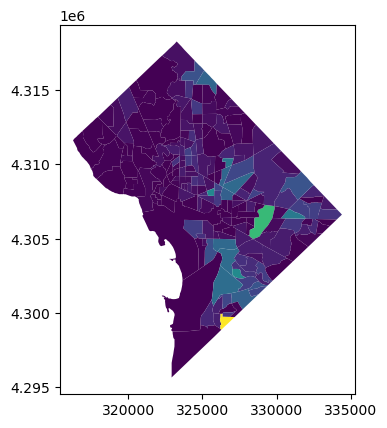

In [38]:
tracts_with_counts_gdf.plot(column='units')